In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

column_list = ['PassengerId', 'Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic = pd.read_csv(r"titanic.csv",usecols=column_list)
fare_list= ['Fare']
titanic_fare = pd.read_csv(r"titanic.csv", usecols = fare_list)


In [116]:
titanic_fare_pd=pd.DataFrame(titanic_fare)
titanic_fare_pd

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
5,8.4583
6,51.8625
7,21.0750
8,11.1333
9,30.0708


In [117]:
#4ai1
titanic_fare_pd.describe()
#titanicpd['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


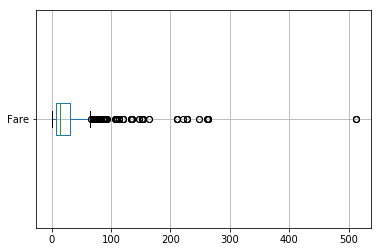

In [118]:
#4ai2
titanic_fare_pd.boxplot(vert=False)

Text(0, 0.5, 'Number of People')

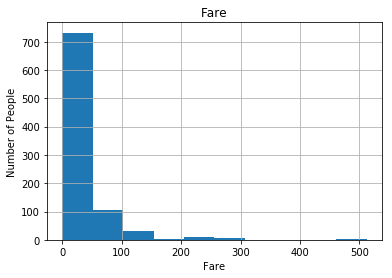

In [119]:
#4ai3
titanic_fare_pd.hist(bins=10)
plt.title("Fare")
plt.xlabel("Fare")
plt.ylabel("Number of People")

In [120]:
#4ai3ai
#It's not symmetrical, rather it's right skewed
#4ai3aii
import statistics as stats
#titanic_fare_pd.mode()
x=stats.mode(titanic_fare_pd['Fare'])
print(x)
for i in titanic_fare_pd:
    if i==x:
        counter = counter + 1
    print(counter)

8.05
0


In [121]:
#4ai4a
titanic_fare_pd.median()

Fare    14.4542
dtype: float64

In [122]:
#4ai4b
print(titanic_fare_pd.quantile(0.75, axis = 0))
print(titanic_fare_pd.quantile(0.25, axis = 0))
IQR=titanic_fare_pd.quantile(0.75, axis = 0) -titanic_fare_pd.quantile(0.25, axis = 0) 
IQR

Fare    31.0
Name: 0.75, dtype: float64
Fare    7.9104
Name: 0.25, dtype: float64


Fare    23.0896
dtype: float64

In [123]:
#4ai4c
#upper
print(titanic_fare_pd.quantile(0.75, axis = 0) + IQR*1.5)
#lower
print(titanic_fare_pd.quantile(0.25, axis = 0) - IQR*1.5)

Fare    65.6344
dtype: float64
Fare   -26.724
dtype: float64


In [124]:
#4ai4d
#Yes there are outliers according to 4ai2)

In [125]:
#5a
file = open(r'C:\Users\carlo\OneDrive\Documents\McMaster\Yr3\2020-spring-summer\BDA 201-Statistics for Data Analysis\Assignment\BDA 201 Week 2 Assignment\gapminder.tsv')
gapminder=pd.read_csv(file, delimiter='\t')
gapminder_lifeExp=gapminder['lifeExp']
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


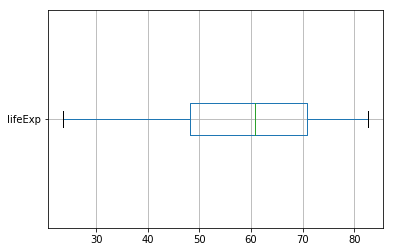

In [126]:
#5bi1
gapminder.boxplot('lifeExp', vert=False)

Text(0, 0.5, 'Number of People')

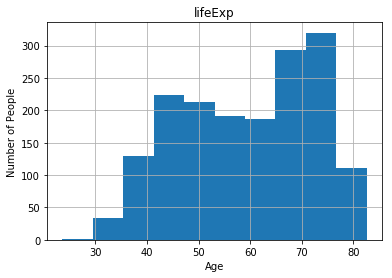

In [127]:
#5bi2a
gapminder.hist('lifeExp',bins=10)
plt.xlabel('Age')
plt.ylabel('Number of People')

In [128]:
#5bi2ai
#It appears to be bimodal

#5bi2aii
stats.mode(gapminder_lifeExp)
#gapminder['lifeExp'].mode()

69.39

In [129]:
#5bi3a
gapminder_lifeExp.median()

60.7125

In [130]:
gapminder_lifeExp.describe()

count    1704.000000
mean       59.474439
std        12.917107
min        23.599000
25%        48.198000
50%        60.712500
75%        70.845500
max        82.603000
Name: lifeExp, dtype: float64

In [131]:
#5bi3b
IQRgapminder=gapminder_lifeExp.quantile(0.75) - gapminder_lifeExp.quantile(0.25) 
print(IQRgapminder)

22.6475


In [132]:
#5bi3c
print(gapminder_lifeExp.quantile(0.75) + IQRgapminder*1.5)
print(gapminder_lifeExp.quantile(0.25) - IQRgapminder*1.5)

104.81675
14.226750000000003


In [133]:
#5bi3d
#There aren't any outliers in the life expectancy data according to the boxplot in 5bi1)

In [136]:
#6
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['JPM', 'LLY', 'GE', 'MSFT']}

price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
price

,JPM,LLY,GE,MSFT
Date,,,,
2015-06-01,57.378181,69.500404,22.755312,42.744289
2015-06-02,57.326088,68.576660,22.797020,42.463726
2015-06-03,57.916550,68.471085,22.963848,42.400375
2015-06-04,57.595257,68.339111,22.738628,41.956924
2015-06-05,58.541733,68.726212,22.763655,41.757805
2015-06-08,58.081524,69.078125,22.721949,41.386757
2015-06-09,58.333328,72.817070,22.797020,41.314346
2015-06-10,59.271114,73.177803,23.047262,42.183174
2015-06-11,59.496872,76.177719,22.947161,42.029312


Text(0, 0.5, 'Stock Price')

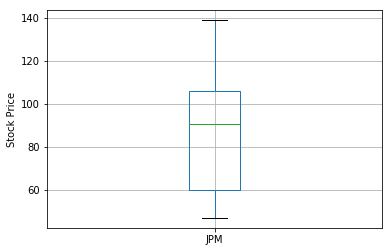

In [137]:
price.boxplot('JPM')
plt.ylabel('Stock Price')

Text(0, 0.5, 'Stock Price')

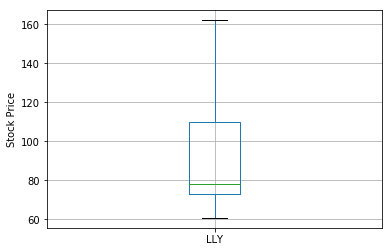

In [138]:
price.boxplot('LLY')
plt.ylabel('Stock Price')

Text(0, 0.5, 'Stock Price')

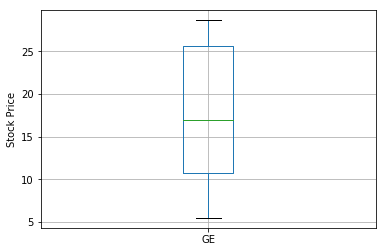

In [139]:
price.boxplot('GE')
plt.ylabel('Stock Price')

Text(0, 0.5, 'Stock Price')

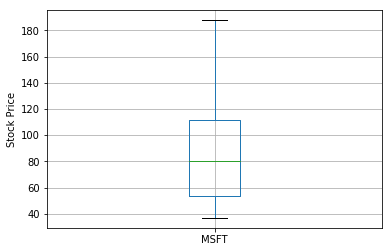

In [140]:
price.boxplot('MSFT')
plt.ylabel('Stock Price')

In [141]:
price.describe()

,JPM,LLY,GE,MSFT
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,87.485394,90.276914,17.831839,88.287823
std,23.671878,23.548028,7.420130,39.225726
min,47.030682,60.728580,5.490000,36.867855
25%,60.154823,72.897430,10.767698,53.729692
50%,90.595661,78.113190,16.927559,80.626347
75%,105.840883,109.717333,25.608069,111.426641
max,138.748215,162.166565,28.645662,187.663330


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A3FCC29A58>,
      dtype=object)

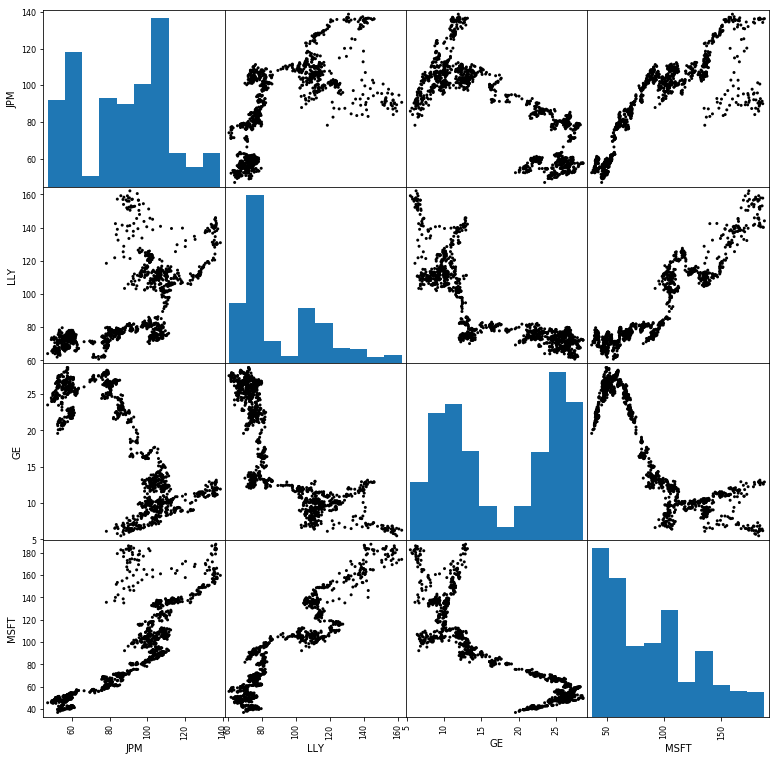

In [142]:
from pandas.plotting import scatter_matrix
scatter_matrix(price, alpha=1, figsize=(13, 13),color='black')

In [143]:
price.corr()
#The most correlated pair is between LLY and MSFT which has a positive correlation
#The least correlated pair is between GE and MSFT which has a negative correlation

,JPM,LLY,GE,MSFT
JPM,1.000000,0.689451,-0.798011,0.851045
LLY,0.689451,1.000000,-0.824951,0.926490
GE,-0.798011,-0.824951,1.000000,-0.864332
MSFT,0.851045,0.926490,-0.864332,1.000000


Text(0, 0.5, 'Stock Price')

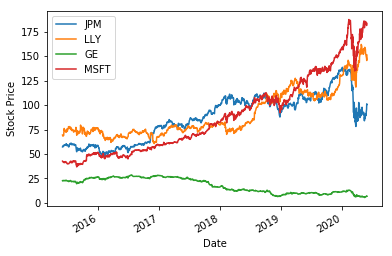

In [144]:
price.plot()
plt.ylabel('Stock Price')

Text(0, 0.5, 'Stock Price')

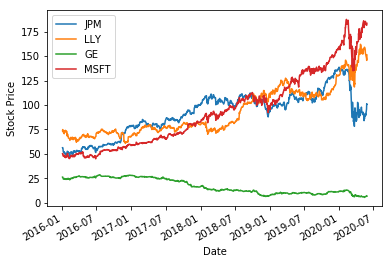

In [145]:
stocks_2016=price.loc['2016-01-01':'2021']
stocks_2016.plot()
plt.ylabel('Stock Price')


In [146]:
stocks_2010=price.loc['2010':'2021']
stocks_2010.describe()
#MSFT has the highest variance and GE has the lowest variance since 2010 as we can we see from the std line


,JPM,LLY,GE,MSFT
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,87.485394,90.276914,17.831839,88.287823
std,23.671878,23.548028,7.420130,39.225726
min,47.030682,60.728580,5.490000,36.867855
25%,60.154823,72.897430,10.767698,53.729692
50%,90.595661,78.113190,16.927559,80.626347
75%,105.840883,109.717333,25.608069,111.426641
max,138.748215,162.166565,28.645662,187.663330


Text(0, 0.5, 'Number of Stocks')

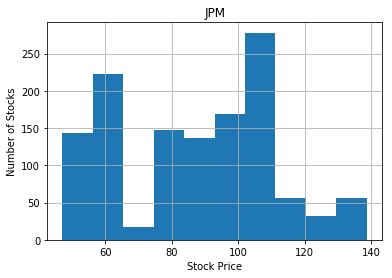

In [147]:
price.hist('JPM',bins=10)
plt.xlabel('Stock Price')
plt.ylabel('Number of Stocks')
#It appears to be bimodal with the price being around $60 and a little above $100

Text(0, 0.5, 'Number of Stocks')

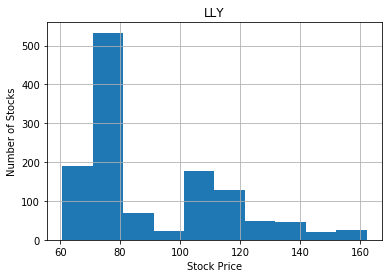

In [148]:
price.hist('LLY',bins=10)
plt.xlabel('Stock Price')
plt.ylabel('Number of Stocks')
#positively skewed witht the majority of stocks in the range of 70-80

Text(0, 0.5, 'Number of Stocks')

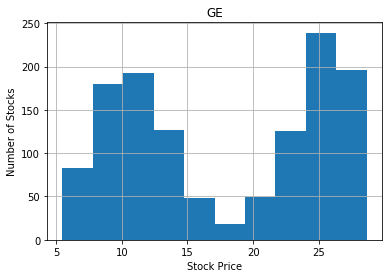

In [149]:
price.hist('GE',bins=10)
plt.xlabel('Stock Price')
plt.ylabel('Number of Stocks')
#bimodal with most stocks being around the price of $25 and $10

Text(0, 0.5, 'Number of Stocks')

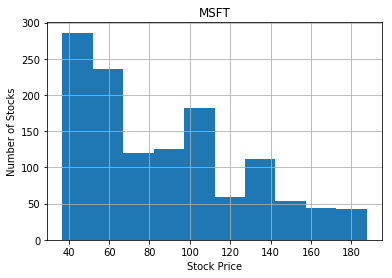

In [150]:
price.hist('MSFT',bins=10)
plt.xlabel('Stock Price')
plt.ylabel('Number of Stocks')
#positively skewed as most stocks aren't too expensive